In [37]:
# Importing important libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver # Selenium library for web automation
from selenium.webdriver.common.by import By # Locating elements on the page ("Load More") button
from selenium.webdriver.common.keys import Keys # Simulating keyboard input
from selenium.webdriver.common.action_chains import ActionChains # Performing mouse actions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
import time
from textblob import TextBlob

In [2]:
# Defining our lists

reviews = []
ratings = []

In [3]:
# Initializing selenium driver
driver = webdriver.Firefox()


IMDB_url = 'https://www.imdb.com/title/tt1517268/reviews?ref_=tt_urv'

# Loading the IMDB reviews page using the selenium driver
driver.get(IMDB_url)

# Function to scroll down the page and click the "Load More" button
def scroll_and_click_load_more():
    try:
        load_more_button = driver.find_element(By.XPATH, '//button[text()="Load More"]')
        # Scrolling to the button
        driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
        time.sleep(3)  # Waiting before clicking on the button
        load_more_button.click()
        return True
    except Exception as e:
        return False
    
while scroll_and_click_load_more():
    time.sleep(6)    

# Extracting the reviews and ratings from the loaded page
IMDB_soup = BeautifulSoup(driver.page_source, 'html.parser')
review_elements = IMDB_soup.find_all('div', class_='text show-more__control')
rating_elements = IMDB_soup.find_all('span', class_='rating-other-user-rating')

for user_review, user_rating in zip(review_elements, rating_elements):
    reviews.append(user_review.get_text(strip=True))
        # Checking if the rating element exists
    if user_rating is not None:
        ratings.append(user_rating.get_text(strip=True))
    else:
        ratings.append('N/A')  # Using 'N/A' for reviews without ratings

# Closing the browser
driver.quit()

In [4]:
#Validating the scraped data to make sure we got the right amount of reviews

print(len(reviews))
print(reviews)
print(len(ratings))

910
['Margot does the best with what she\'s given, but this film was very disappointing to me. It was marketed as a fun, quirky satire with homages to other movies. It started that way, but ended with over-dramatized speeches and an ending that clearly tried to make the audience feel something, but left everyone just feeling confused. And before you say I\'m a crotchety old man, I\'m a woman in my 20s, so I\'m pretty sure I\'m this movie\'s target audience. The saddest part is there were parents with their kids in the theater that were victims of the poor marketing, because this is not a kid\'s movie. Overall, the humor was fun on occasion and the film is beautiful to look at, but the whole concept falls apart in the second half of the film and becomes a pity party for the "strong" woman.', "The first reason to go see it:It's good fun. It's fairytale comedy, over the top, pastiche and it works! It simply does! Margot Robie and Ryan Gosling have great chemistry. Everybody sorta agrees o

In [25]:
# Storing the data in a data frame

reviews_dic = {'user reviews' : reviews, 'user ratings' : ratings}
IMDB_reviews_DF = pd.DataFrame(reviews_dic)
IMDB_reviews_DF.head()

,user reviews,user ratings
0,"Margot does the best with what she's given, but this film was very disappointing to me. It was marketed as a fun, quirky satire with homages to other movies. It started that way, but ended with over-dramatized speeches and an ending that clearly tried to make the audience feel something, but left everyone just feeling confused. And before you say I'm a crotchety old man, I'm a woman in my 20s, so I'm pretty sure I'm this movie's target audience. The saddest part is there were parents with their kids in the theater that were victims of the poor marketing, because this is not a kid's movie. Overall, the humor was fun on occasion and the film is beautiful to look at, but the whole concept falls apart in the second half of the film and becomes a pity party for the ""strong"" woman.",6/10
1,"The first reason to go see it:It's good fun. It's fairytale comedy, over the top, pastiche and it works! It simply does! Margot Robie and Ryan Gosling have great chemistry. Everybody sorta agrees on that.Kids are probably not the target audience, although if they would watch it, they wouldnt be shocked or something, they would merely be missing the social and gender issues and jokes of many scenes.The second reason to go see it:It really looks the part. I am not into sets or costumes in particular (at all), but I was impressed with the fun world they had created. It really looks fabulous and I really appreciate it when a movie is eyecandy from start till finish.The third and best reason to go see it:I am a dude and I honestly feared the worst when going along with my wife. But I honestly did not expect this sugarcoated, fairytale Barbieworld to touch my heart in the end, but it did! What the what!They somehow created a finale, that gave me goosebumps and a terrific feel good vibe. You cant wish for more than that. As a dude watching a Barbie picture. Hello!The only reason AGAINST seeing it:If you are a dude and dont like men being portrayed as weak and emotionally inferior to women, then better not go see it, because all the men are (hilarious) loosers and whiners in this movie, with a brilliant performance by Ryan Gosling as an insecure crybaby, who just cant get Barbie to love him.Feared the worst, but in the end I was pleasantly suprised. It's certainly not a brilliant movie, but it is a perfect summer escape movie, with lots of jokes and a wonderful feel good vibe!",7/10
2,"As a woman that grew up with Barbie, I was very excited for this movie. I was curious to see how they would evolve the ""stereotypical Barbie"" into something more. But the messaging in this movie was so heavy handed that it completely lost the plot. I consider myself a proponent of gender equality, and this ain't the way to get it.Barbieland flips the script on the patriarchy of the real world, giving women the power and leaving the Kens as attractive accessories. Once Ken gets a glimpse of the real world he brings the patriarchy to Barbieland and the Barbies are ""brainwashed"" (this happens suddenly and without much explanation). The Kens are bumbling fools with zero understanding of governance, and Barbieland falls into disarray.The movie's solution to this is for the Barbies to give a lot of Ted talks on the patriarchy, fool the Kens into war with each other, and rule once again. But isn't the point if gender equality... equality?The feminist messaging could have been so much more effective if it was laid on so THICK. More humor and nuance please. The story gets lost, the real world characters don't add much, and not much changes in the end.What was enjoyable was the acting, the sets and of course the nostalgia.",6/10
3,"I don't know if I put spoilers in here. I am super worn out. Haha So I will just put that I did.I had no clue what this movie was like or about. It just seemed like a strange, different type of movie. To me, it was going to be some kind of movie for kids that tells you everything is perfect. It was nothing like that.The

In [34]:
# Data cleaning

IMDB_reviews_DF.drop_duplicates(subset = ['user reviews'], inplace = True)
IMDB_reviews_DF.dropna(subset = ['user reviews'], inplace = True)

print(len(IMDB_reviews_DF))

910


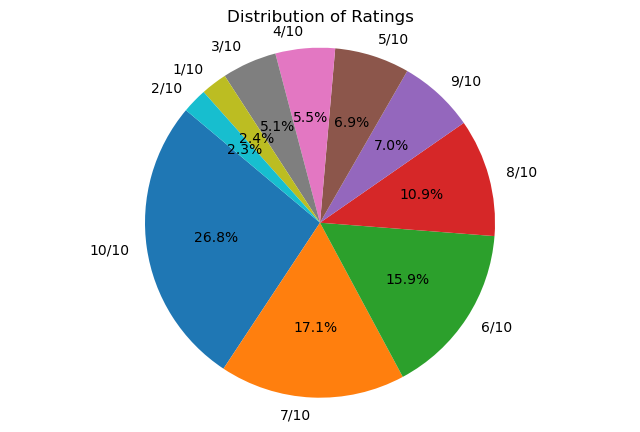

In [35]:
# Data visualization (Distribution of ratings)

rating_counts = IMDB_reviews_DF['user ratings'].value_counts()
plt.figure(figsize = (8, 5))
plt.pie(rating_counts, labels = rating_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

In [72]:
# Sentiment analysis on user reviews

def sentiment_analysis(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the function and storing it in a new column
IMDB_reviews_DF['sentiment'] = IMDB_reviews_DF['user reviews'].apply(sentiment_analysis)

# Counting the number of reviews in each sentiment category
sentiment_count = IMDB_reviews_DF['sentiment'].value_counts()
print(sentiment_count)
IMDB_reviews_DF.tail()

Positive    718
Neutral     172
Negative     20
Name: sentiment, dtype: int64


,user reviews,user ratings,sentiment
905,"I just finished watching Barbie and I have to say, it was absolutely amazing! The perfect blend of humor, cuteness, and emotion really made the film stand out. The message was conveyed flawlessly and it had a big impact on me. It also brought back some great memories from my childhood. All of the details on the houses, the dialogues, and the clothes were so impressive that they really added to the overall experience. Margot Robbie and Ryan Gosling were absolutely brilliant in their performances and Ken's act had me laughing non-stop! This movie is definitely a masterpiece. I must say, good job, Greta! I only gave it 9 out of 10 because I wish it could have been a bit longer.",9/10,Positive
906,"The movie was fun and all and It was horrible the way kens treated barbies I mean I also see how they have been treated by Barbies but they have got too far I also loved when she met that old lady that came with her as an idea in the company and it was funny when she spilled the tea all over herself,furthermore the intro was so hilarious the way those little young (girls\boys) destroyed the baby dolls,in addition I would say that I think the end was kind of bittersweet when she stopped being Barbie and moved to the real world to live with people as Barbara,It's an excvellent movie to watch alone or with family and friends.",1/10,Positive
907,"Barbie is a film that stands out by defying initial assumptions, proving that it is not just a silly or ironic production. On the contrary, it remarkably addresses important themes with a lightness and clarity that are truly impressive. The storyline delves into subjects such as self-esteem, the value of friendship, and the significance of persevering in the pursuit of one's dreams. Barbie, the main character, emerges as a role model of strength and determination for young viewers, encouraging them to believe in themselves and face challenges with a smile. Furthermore, the film's high-quality animations and captivating soundtrack contribute to a visually and musically gratifying experience. Barbie pleasantly surprises audiences with its positive message, conveyed in an accessible and enjoyable manner.",9/10,Positive
908,"I saw Barbie yesterday. It was surprisingly good. I think they did as well as they can with the source material. It's a little smarter than you expect they bring attention to a lot of societal issues still all surface level stuff though they were not discussed in a super meaningful way. However it's more than enough given the audience and kids should be learning a little bit about that stuff because it's important. It's full of a lot of emotion and great acting by Margot Robbie and Ryan Goslin. These two were great and probably the best I've ever seen them act. Movie also has a great message and lessons which is a plus these days when all movies are is just special effects, remakes, and franchises. It was enjoyable and entertaining. However it did not feature the song Barbie Girl by Aqua so 0/10.",10/10,Positive
909,"The jokes are entertaining and the movie has the just correct amount of dramatic storyline to make it more than an empty comedy.The repetitive use of patriarchy is rather in the movie because it to wants to make sure that everyone understands the message and not because it thinks men = bad and woman = good. Already after the first 30 minutes the message is super clear and thats where it gets a bit empty. It fights so much against stereotypical masculinity, consumerism and capitalism but still puts a 4 minutes long chevrolet commercial (which screams how rugged the brand is) in the movie that entirely destroys the credibility of the movie.",10/10,Neutral
